In [ ]:
import numpy as np 
import pandas as pd 

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")


# Uploading train set and test set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Training data
train = pd.read_csv('/content/drive/MyDrive/data/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/Test.csv')
print('Train data shape: ', train.shape ,"and test data shape is",test.shape)


Train data shape:  (70000, 3) and test data shape is (30000, 2)


In [ ]:
train.sample(15,random_state=1)


,ID,text,label
6670,2ALVE9S,3idek mabrouk wsnine deyma mr le president,1
49567,F79SPUZ,ba3dek zayed,1
50796,KUJG65Q,thaanou ya twenssaa jma33eet ettebssi w rcd ra...,1
22310,ZFEJAUX,tres belle music mon frere,1
54037,JVWDYAR,chb 7achek ama 3onsourya ltahki aliha lbehi we...,-1
6869,XAXZYM5,ana mkachakh mais slim eryahi 3wen barchhh ca ...,1
13601,VI3S9OS,tawou tereb7ou el3aaaasssssbbbbaaaa,-1
3271,V36XWH5,farhanin barcha bichoix nabil oildna oi nosbro...,1
12647,ESHO33Q,je m appelle fersi mounir,0
13931,G3OLHTE,haka chna9esha l botoula 7ata hya ken bouzid,-1


In [ ]:
test.sample(15,random_state=1)

,ID,text
10747,NDPW3HP,alah yar7em omkom
12573,GXRZAGE,kol 3am winti 7aie bkhir wild 3ami si slim
29676,6783N40,enti sraft sraft karék chrit tour effel ya slo...
8856,IOYPDFJ,era2iss mouch ken t7awell el 3ayilt echahid 3a...
21098,J71HOMA,brave homme djafer bravo mr djafer de tizi ouzou
17458,OE1V7FS,wwwww belle chanson j adore
1476,VJVA15F,ena 3andi talab wa7id madhabeya traj3elna osem...
5120,0G7BAD0,andhaf wa achraf hezeb
18338,NLFS3SU,eli 9olt el kol s7i7 boss ena m3ak
28279,QKNKX6E,si thabthoub barra rajaa flous gaddafi wa saye...


# Data Visualisation

In [ ]:
# negative sentiments
negative_tweets = train[train['label']==-1]['text']
negative_tweets.values[2]

'bereau degage nathef ya slim walahi ya7chiw fih jma3a lem3amel 3lihom walah kit jib messi lana3mlou chay 7amlet nathafa fil bureaux ca jam3iya 3ari9a mel 3am 94 bdet da5la fi 7it choufelna hal mochkla belehi te5na9na mel fada tous les équipe mergine fina ken jit kifek walah maye5lsouch wi3adiw 3am jaych bech yetrabaw elkoura fi se9ik enti en9eth jam3iya ya slim wna3ref tnajim ta3melha'

In [ ]:
# positive sentiments
neutral_tweets = train[train['label']==1]['text']
neutral_tweets.values[5]

'mabrouk li tounes kolha bi monadhel felecitation congratulation auguri'

In [ ]:
# neutral sentiments
neutral_tweets = train[train['label']==0]['text']
neutral_tweets.values[4]


'slm brabi kifeh enajmo enbadlo meken alinti5ab'

In [ ]:
#Distribution of the label Column
print(train.label.value_counts())
#not a good distribution

 1    38239
-1    29295
 0     2466
Name: label, dtype: int64


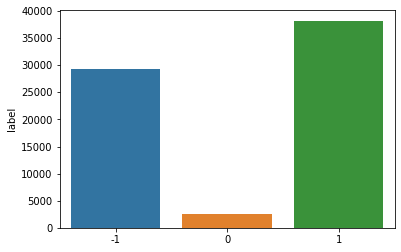

In [ ]:

#Using seaborn to visualize the #istribution of the label Column 
sns.barplot(train['label'].value_counts().index,train['label'].value_counts())

# data preprocessing

In [ ]:
#Missing values --> No missing values
train.isnull().sum()

ID       0
text     0
label    0
dtype: int64

In [ ]:
train
aux = pd.DataFrame()
aux["ID"] = train["ID"]
aux['text'] = train['text']
aux['label'] = train['label']


In [ ]:
indexNames = aux[ aux['label'] == 0 ].index
aux.drop(indexNames , inplace=True)

In [ ]:
def remove_consec_duplicates(s):
    new_s = ""
    prev = ""
    for c in s:
        if len(new_s) == 0:
            new_s += c
            # print("if 1 new_s",new_s)
            prev = c
            #print("if 1 prev",prev)
        if c == prev and c!="h" and c!="f": # except "h"
            continue
        else:
            new_s += c
            #print("if 2 new_s",new_s)
            prev = c
            #print("if 2 prev",prev)
    return new_s

In [ ]:
aux["text"]=aux['text'].apply(lambda x :remove_consec_duplicates(x))

In [ ]:
#train.compare(aux)

In [ ]:
def data_cleaning(text):
    text = text.lower() #Make text lowercase
    text = re.sub('\[.*?\]', '', text) #remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove links
    text = re.sub('<.*?>+', '', text) #remove text in <...>
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
    text = re.sub('\n', '', text) #remove end of line character
    text = re.sub('3','a',text)
    text = re.sub('2','a',text)
    text = re.sub('4','dh',text)
    text = re.sub('5','kh',text)
    text = re.sub('7','h',text)
    text = re.sub('9','k',text)
    text = re.sub('8','gh',text)
    return text


In [ ]:
aux['text'] = aux['text'].apply(lambda x: data_cleaning(x)) 
test['text'] = test['text'].apply(lambda x: data_cleaning(x))

In [ ]:
aux.head()

,ID,text,label
0,13P0QT0,asba lek ou le seim riahi ou asba le ca,-1
1,SKCLXCJ,chaaeb feykelkoum menghir tahayoul ou kresi,-1
2,V1TVXIJ,bereau degage nathef ya slim walahi yahchiw fi...,-1
3,U0TTYY8,ak slouma,1
4,68DX797,entom titmanou lina ahna aid moubarik ahna cha...,-1


In [ ]:
aux["text"] = aux["text"].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))
#removing words with a length less than 2

In [ ]:
#train.compare(aux)

In [ ]:
#size of vocabulary before preprocessing
corpus1 = ' '.join(list(train['text']))

print('Number of tokens before normalization:',len(set((corpus1.split(' ')))))

corpus2 = ' '.join(list(aux['text']))

print('Number of tokens after normalization:',len(set((corpus2.split(' ')))))

print("number of words dropped after normalization and preprocessing is",len(set((corpus1.split(' '))))-len(set((corpus2.split(' ')))))

Number of tokens before normalization: 144333
Number of tokens after normalization: 116800
number of words dropped after normalization and preprocessing is 27533


# separate cloud

In [ ]:
!pip install wordcloud

In [ ]:
import collections 
from collections import Counter

# afficher les mots les plus repétés pour les sentiments positifs
print("les mots les plus repétés pour les sentiments positifs",Counter(" ".join(aux["text"][aux["label"]==1]).split()).most_common(40))

# afficher les mots les plus repétés pour les sentiments négatifs
print("les mots les plus repétés pour les sentiments négatifs",Counter(" ".join(aux["text"][aux["label"]==-1]).split()).most_common(40))


les mots les plus repétés pour les sentiments positifs [('rabi', 6915), ('slim', 4333), ('bravo', 3519), ('maak', 2672), ('alah', 2169), ('slouma', 2053), ('kol', 1946), ('ala', 1547), ('mabrouk', 1508), ('maalem', 1349), ('eli', 1120), ('nchalah', 1066), ('dima', 1018), ('inchalah', 971), ('bech', 961), ('khir', 940), ('barcha', 927), ('aam', 862), ('ama', 806), ('men', 792), ('alik', 790), ('ken', 755), ('ahna', 733), ('riahi', 686), ('brabi', 652), ('tounes', 651), ('walah', 638), ('ena', 605), ('aala', 603), ('ana', 592), ('bon', 575), ('club', 551), ('ili', 531), ('les', 525), ('mak', 517), ('enti', 514), ('ahla', 505), ('min', 504), ('merci', 501), ('haja', 494)]
les mots les plus repétés pour les sentiments négatifs [('slim', 2619), ('ala', 2222), ('eli', 2049), ('bech', 1949), ('ken', 1860), ('rabi', 1548), ('men', 1328), ('kol', 1328), ('mala', 1163), ('alah', 1061), ('hata', 1044), ('bara', 1032), ('fih', 997), ('ama', 994), ('ili', 975), ('enti', 968), ('tawa', 921), ('min',

In [ ]:
from collections import Counter
positifs=[]
négatifs=[]
for i in range(80):
    positifs.append((Counter(" ".join(aux["text"][aux["label"]==1]).split()).most_common(80))[i][0])
print(positifs)
for i in range(80):
    négatifs.append((Counter(" ".join(aux["text"][aux["label"]==-1]).split()).most_common(80))[i][0])
print(négatifs)



['rabi', 'slim', 'bravo', 'maak', 'alah', 'slouma', 'kol', 'ala', 'mabrouk', 'maalem', 'eli', 'nchalah', 'dima', 'inchalah', 'bech', 'khir', 'barcha', 'aam', 'ama', 'men', 'alik', 'ken', 'ahna', 'riahi', 'brabi', 'tounes', 'walah', 'ena', 'aala', 'ana', 'bon', 'club', 'ili', 'les', 'mak', 'enti', 'ahla', 'min', 'merci', 'haja', 'maa', 'fil', 'rajel', 'saha', 'bien', 'hata', 'tawa', 'wlh', 'bone', 'alina', 'patron', 'vive', 'nchala', 'wala', 'president', 'fel', 'mouch', 'chaab', 'yarhmou', 'fih', 'mala', 'chay', 'kima', 'haka', 'lkol', 'fik', 'est', 'tunis', 'inti', 'bos', 'maana', 'enchalah', 'rak', 'wenti', 'nes', 'pour', 'dawla', 'tounis', 'wel', 'jamaiya']
['slim', 'ala', 'eli', 'bech', 'ken', 'rabi', 'men', 'kol', 'mala', 'alah', 'hata', 'bara', 'fih', 'ama', 'ili', 'enti', 'tawa', 'min', 'aala', 'wala', 'chay', 'tounes', 'mouch', 'fil', 'taw', 'brabi', 'barcha', 'alik', 'haja', 'chkoun', 'les', 'fel', 'kan', 'riahi', 'kif', 'ena', 'kima', 'khir', 'hal', 'maa', 'aal', 'mtaa', 'club

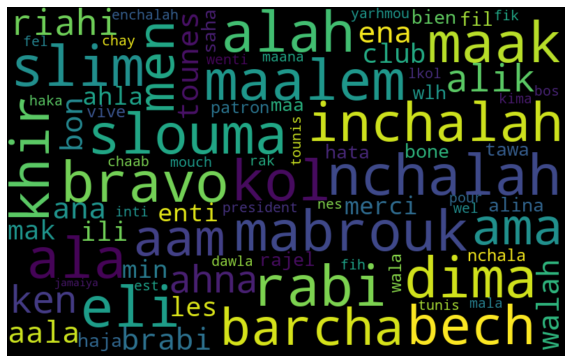

In [ ]:
#positive 
from wordcloud import WordCloud
positive_words =" ".join([text for text in positifs])
word_cloud = WordCloud(width=800,height=500,random_state=1,max_font_size=80).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

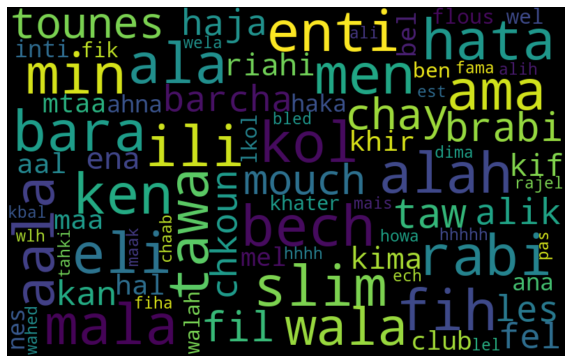

In [ ]:
#negative 
from wordcloud import WordCloud
négatifs_words =" ".join([text for text in négatifs])
word_cloud = WordCloud(width=800,height=500,random_state=1,max_font_size=80).generate(négatifs_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import torch
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
labels = aux.label.values
sentences=aux.text.values

In [ ]:
labels+=1

In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional,SpatialDropout1D




In [ ]:
feautres = 3000
embedding_dim = 64
max_length = 128
oov_tok = '<OOV>' #  Out of Vocabulary

In [ ]:
tokenizer = Tokenizer(num_words = feautres, oov_token=oov_tok)
tokenizer.fit_on_texts(aux['text'])
word_index = tokenizer.word_index

In [ ]:
word_index

{'<OOV>': 1,
 'rabi': 2,
 'slim': 3,
 'ala': 4,
 'bravo': 5,
 'kol': 6,
 'alah': 7,
 'eli': 8,
 'maak': 9,
 'bech': 10,
 'ken': 11,
 'slouma': 12,
 'men': 13,
 'ama': 14,
 'barcha': 15,
 'mabrouk': 16,
 'khir': 17,
 'mala': 18,
 'aala': 19,
 'ili': 20,
 'alik': 21,
 'enti': 22,
 'hata': 23,
 'tounes': 24,
 'dima': 25,
 'maalem': 26,
 'min': 27,
 'brabi': 28,
 'fih': 29,
 'tawa': 30,
 'riahi': 31,
 'nchalah': 32,
 'ahna': 33,
 'wala': 34,
 'fil': 35,
 'bara': 36,
 'ena': 37,
 'les': 38,
 'haja': 39,
 'chay': 40,
 'mouch': 41,
 'walah': 42,
 'ana': 43,
 'club': 44,
 'inchalah': 45,
 'aam': 46,
 'maa': 47,
 'fel': 48,
 'taw': 49,
 'chkoun': 50,
 'kima': 51,
 'kan': 52,
 'rajel': 53,
 'kif': 54,
 'haka': 55,
 'aal': 56,
 'inti': 57,
 'hal': 58,
 'wlh': 59,
 'fik': 60,
 'nes': 61,
 'bel': 62,
 'mtaa': 63,
 'lkol': 64,
 'wel': 65,
 'chaab': 66,
 'alina': 67,
 'mel': 68,
 'est': 69,
 'khater': 70,
 'ben': 71,
 'alih': 72,
 'lel': 73,
 'howa': 74,
 'bon': 75,
 'mak': 76,
 'mais': 77,
 'flous':

In [ ]:
train_sequences = tokenizer.texts_to_sequences(aux['text'])

In [ ]:
train_data = pad_sequences(train_sequences, maxlen=max_length,)

In [ ]:
train_data[3]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 12], dtype=int32)

In [ ]:
training_label = pd.get_dummies(aux['label']).values
"jebna label"

In [ ]:
training_label[3]

array([0, 1], dtype=uint8)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data,training_label, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(54027, 128) (54027, 2)
(13507, 128) (13507, 2)


In [ ]:
from keras import backend as K

def recall_(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_(y_true, y_pred)
    recall = recall_(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = Sequential()
model.add(Embedding(feautres,embedding_dim ,input_length=max_length))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(2,activation='softmax' ))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 64)           192000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 128, 64)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 258,306
Trainable params: 258,306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['Accuracy',recall_,precison_,f1_score])

In [ ]:
history =model.fit(X_train, Y_train, epochs = 3, batch_size=128, validation_split=0.2,verbose=2)#3malna accuracy f1_score recall precision

Epoch 1/3
338/338 - 24s - loss: 0.4958 - Accuracy: 0.7457 - f1_score: 0.7458 - precision_: 0.7458 - recall_: 0.7458 - val_loss: 0.4061 - val_Accuracy: 0.8080 - val_f1_score: 0.8084 - val_precision_: 0.8084 - val_recall_: 0.8084 - 24s/epoch - 72ms/step
Epoch 2/3
338/338 - 7s - loss: 0.3868 - Accuracy: 0.8183 - f1_score: 0.8183 - precision_: 0.8183 - recall_: 0.8183 - val_loss: 0.3956 - val_Accuracy: 0.8103 - val_f1_score: 0.8111 - val_precision_: 0.8111 - val_recall_: 0.8111 - 7s/epoch - 20ms/step
Epoch 3/3
338/338 - 7s - loss: 0.3667 - Accuracy: 0.8256 - f1_score: 0.8257 - precision_: 0.8257 - recall_: 0.8257 - val_loss: 0.3882 - val_Accuracy: 0.8146 - val_f1_score: 0.8148 - val_precision_: 0.8148 - val_recall_: 0.8148 - 7s/epoch - 20ms/step


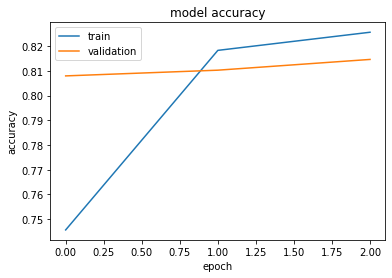

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()


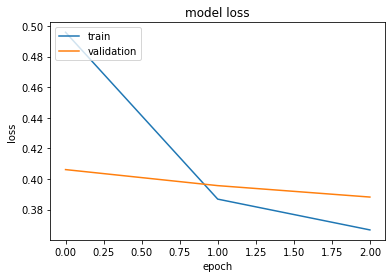

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)

print("loss:", score[0])
print("Test Accuracy:", score[1])
print("recall: ", score[2])
print("percision: ", score[3])
print("f1score: ", score[4])
#testina bel exemple hay resultat najmou nzidouha fel etude comparati

423/423 [==============================] - 3s 7ms/step - loss: 0.3978 - Accuracy: 0.8134 - f1_score: 0.8138 - precision_: 0.8138 - recall_: 0.8138
loss: 0.3978314697742462
Test Accuracy: 0.8134300708770752
f1score:  0.8138297200202942
percision:  0.813829779624939
recall:  0.813829779624939


In [ ]:
def predict(data):
  data = tokenizer.texts_to_sequences(data)
  data = pad_sequences(data, maxlen=128)
  predic = model.predict(data,batch_size=1)
  labels_t = ['Negative','Positive'] 
  print(labels_t[np.argmax(predic)])

In [ ]:
data=['mahleeek nheeebek barcha']
predict(data)

Positive


In [ ]:
data=['ye kaleb ye sa9et']
predict(data)

Negative


In [ ]:
test_data = tokenizer.texts_to_sequences(test['text'])
test_data = pad_sequences(test_data, maxlen=128)
pred = model.predict(test_data,batch_size = 128)


In [ ]:
test_data = test['text']
test_id = test['ID']

data_test = pd.DataFrame(data = {'id' : test_id ,'text': test['text'], 'negative' : pred[:,0] ,'Positive' : pred[:,1]  })

In [ ]:
data_test

,id,text,negative,Positive
0,2DDHQW9,barcha aaindou fiha hak w barcha teflim kadhalik,0.399535,0.600465
1,5HY6UEY,ye gernabou ye kahba,0.998788,0.001212
2,ATNVUJX,saber w barra rabbi maak khouya,0.001691,0.998309
3,Q9XYVOQ,chaaébbb tahaaaaannnnnnnnnnn tfouuhh,0.705144,0.294856
4,TOAHLRH,rabi ykhalihoulek w yfarhek bih w inchallah it...,0.322834,0.677166
...,...,...,...,...
29995,NHXTL3R,me ihebekch raw,0.633787,0.366213
29996,U1YWB2O,nchallah rabi maak w iwafkek mais just habit n...,0.004203,0.995797
29997,O3KYLM0,slim rabi maak w ekhedem w khalli lhossed lemn...,0.220179,0.779821
29998,W4C38TY,bara khalis rouhik yizi mitbalait jamaiya hlak...,0.987331,0.012669


In [ ]:
import pickle
with open('pcdtunizibert_pkl.pkl', 'wb') as files:
    pickle.dump(, files)